In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

plt.rcParams["figure.figsize"] = (18, 6)

# plt.set_cmap(mpl.colormaps['gray'])
# plt.rcParams['image.cmap'] = 'Pastel1'


In [2]:
# daily household spend

In [3]:
daily_hh_spend = pd.read_csv('data/daily_hh_spend.csv', index_col=0)

In [4]:
daily_hh_spend

day  household_key  alcohol  beverages  concessions  dairy  drug  \
0       101              1      0.0       7.34         0.00   4.77   0.0   
1       101              8      0.0       0.00         7.99   6.31   0.0   
2       101             13      0.0       0.00         0.00   2.79   0.0   
3       101             24      0.0       0.00         0.00   3.99   0.0   
4       101             35      0.0       0.00         0.00   0.00   0.0   
...     ...            ...      ...        ...          ...    ...   ...   
198323  708           2400      0.0       0.00         0.00   0.00   0.0   
198324  708           2460      0.0       0.00         0.00   0.00   0.0   
198325  708           2471      0.0       0.00         0.00   2.39   0.0   
198326  708           2483      0.0       3.19         0.00  14.14   0.0   
198327  708           2500      0.0       0.00         0.00   3.15   0.0   

        garden  grain_goods  grocery  home_family  junk_food  kitchen  meat  \
0          0.0        10.48     0.00        12.18      10.91     0.00  6.27   
1          0.0         0.00     0.00         0.00       1.00     0.33  1.09   
2          0.0         0.00     0.00         0.00      12.50     0.00  0.00   
3          0.0        10.00     0.00         0.00      26.00     0.00  0.00   
4          0.0         0.00     0.00         0.00       7.60     0.00  0.00   
...        ...          ...      ...          ...        ...      ...   ...   
198323     0.0         0.00     0.00        19.48       1.00     0.00  0.00   
198324     0.0         0.00    10.97        12.99       0.00     0.00  0.00   
198325     0.0         0.00     0.00         0.00       0.00     0.00  1.67   
198326     0.0        30.18     0.00        19.78      19.55     5.99  4.48   
198327     0.0         5.36     7.08         0.00       0.00     3.19  7.18   

        misc  produce  seasonal  total_sales  
0       1.50     0.00      0.00        53.45  
1       1.94     0.00      0.00        18.66  
2       0.00     0.00     27.73        43.02  
3       0.00     0.00      0.00        39.99  
4       0.00     0.00      0.00         7.60  
...      ...      ...       ...          ...  
198323  0.00     0.00      0.00        20.48  
198324  0.00     0.00      0.00        23.96  
198325  0.00     0.00      0.00         4.06  
198326  0.00    19.34      0.00       116.65  
198327  8.44    10.72      0.00        45.12  

[198328 rows x 18 columns]

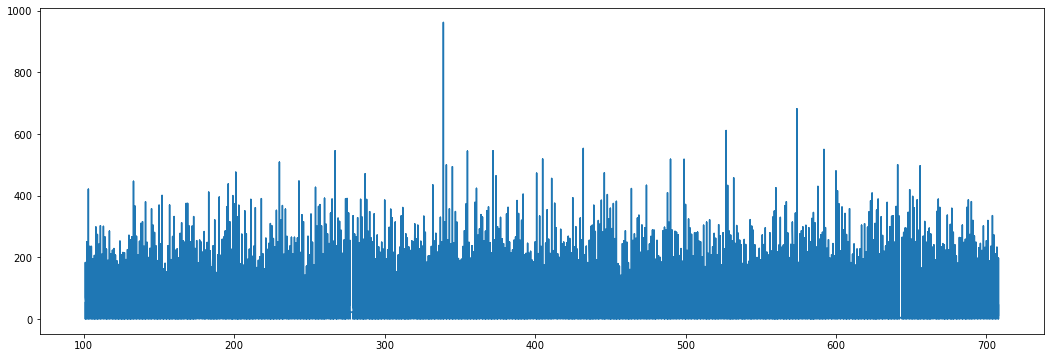

In [5]:

# # Create data
x=list(daily_hh_spend['day'])
cols = daily_hh_spend.columns[-1]
y = daily_hh_spend[cols].T.to_numpy()

fig, ax = plt.subplots()

plt.plot(x, y,)
plt.show()

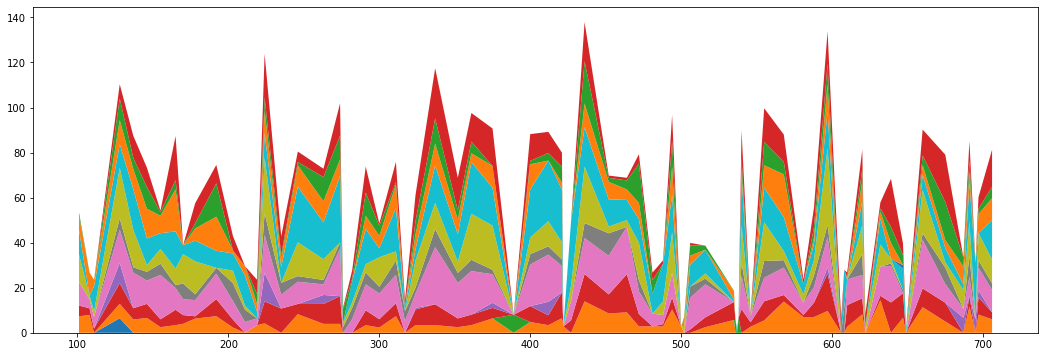

In [6]:
# split by household
temp = daily_hh_spend[daily_hh_spend['household_key']==1]


# print(temp.columns)
# Create data
x=list(temp['day'])
cols = temp.columns[2:-1]
y = temp[cols].T.to_numpy()

fig, ax = plt.subplots()

plt.stackplot(x, y, labels=cols, baseline='zero')
plt.show()

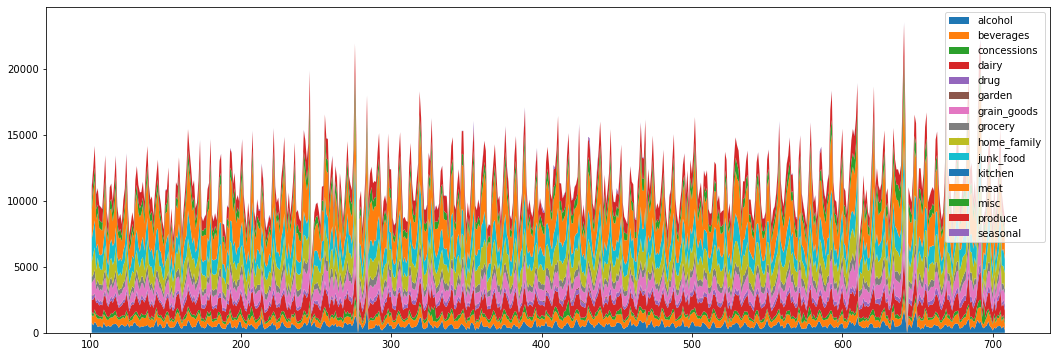

In [7]:

temp2 = daily_hh_spend.drop(['household_key', 'total_sales'], axis=1).groupby('day').sum()

# Create data
x=list(temp2.index)
cols = temp2.columns
y = temp2[cols].T.to_numpy()

fig, ax = plt.subplots()

plt.stackplot(x, y, labels=cols, baseline='zero')
plt.legend()
plt.show()


We want to get broader strokes on how customers are purchasing -- or, rather, which customers are purchasing similarly.

# Data Science Interlude; grouping households

In [8]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from seaborn import heatmap



Data Processing:

- train test split?
- minmax scaler for monetary values ... consider taking % of total spend and standard scaling the data.
- m_score has high correlation with other features
- demographic information may not be relevant to the clustering we're looking for. We want customers who make similar purchases; consider applying dummy/product_id-count columns

### Based on Total Sales by Section; Demographic Information

In [9]:
grouping_households = pd.read_csv('data/hh_summary.csv',index_col=0)

In [10]:

scaler = MinMaxScaler()
scaler_fit = scaler.fit(grouping_households)
grouping_households_scaled = scaler_fit.transform(grouping_households)


kmeans = KMeans(n_clusters=5)
results = kmeans.fit_predict(grouping_households_scaled)
assert len(results) == len(grouping_households), 'sanity check'

In [11]:
# adding labels back to original data
grouping_households['label'] = results

In [12]:
grouping_households['label'].value_counts()

3    242
1    157
0    144
2    143
4    115
Name: label, dtype: int64

### Evaluating the Model

We didn't add in timeseries based data to this clustering method.

What can we say about the model labels -- how would we explain them to a client?

We might be concerned with over-weight relationships/collinearity; or else bias being introduced by derived features.

This first labelling methodology is to simply group customers based on their attributes. So, which ones contributed to their being scored?

Later we might look at product lists or time series data to 'group' our customers into similar performers. These sorts of labels could be useful for many reasons;
    
    - advertisement targeting

    - product logistics 
    
    - sales forecasts

In [13]:
heatmap(grouping_households[['age_45_plus', 'income_50K_plus',
       'single_couple_family', 'has_kids', 'single', 'couple', 'r_score',
       'f_score', 'm_score', 'rfm_score', 'rfm_bins','label']].corr(),annot=True)

<AxesSubplot:>

<AxesSubplot:>

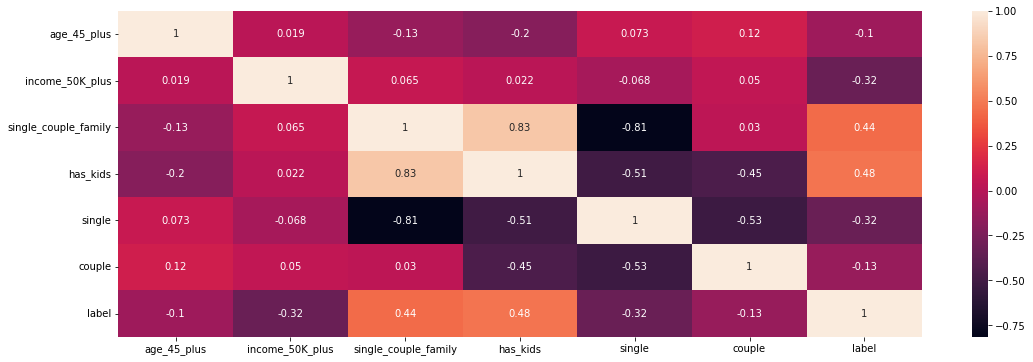

In [14]:
heatmap(grouping_households[['age_45_plus', 'income_50K_plus',
       'single_couple_family', 'has_kids', 'single', 'couple','label']].corr(),annot=True)

Interestingly, we see that the 'income 50K plus' tag is highly negatively correlated with our labels. I introduced this binary flag as a 'means' of distinguishing those with means from those who were operating on a very low budget. 

In [15]:
_50K_plus = grouping_households[grouping_households['income_50K_plus'] ==1]['household_key']
_50K_false = grouping_households[grouping_households['income_50K_plus'] ==0]['household_key']
all_transactions = pd.read_csv('data/transaction_data.csv')

In [16]:
len(_50K_plus), len(_50K_false)

(417, 384)

In [17]:
all_transactions[all_transactions['household_key'].isin(_50K_plus)].groupby('household_key')['SALES_VALUE'].sum().mean(), all_transactions[all_transactions['household_key'].isin(_50K_plus)]['SALES_VALUE'].sum()

(6353.035755395685, 2649215.91)

In [18]:
all_transactions[all_transactions['household_key'].isin(_50K_false)].groupby('household_key')['SALES_VALUE'].sum().mean(), all_transactions[all_transactions['household_key'].isin(_50K_false)]['SALES_VALUE'].sum()

(4813.80299479167, 1848500.3499999999)

I opted to make this a binary flag as opposed to a series of binaries because of class imbalance issues. It also serves as a heuristic; where less than 50k, to me, indicates financial pressure to save money -- especially in households with more than one person. 

<AxesSubplot:>

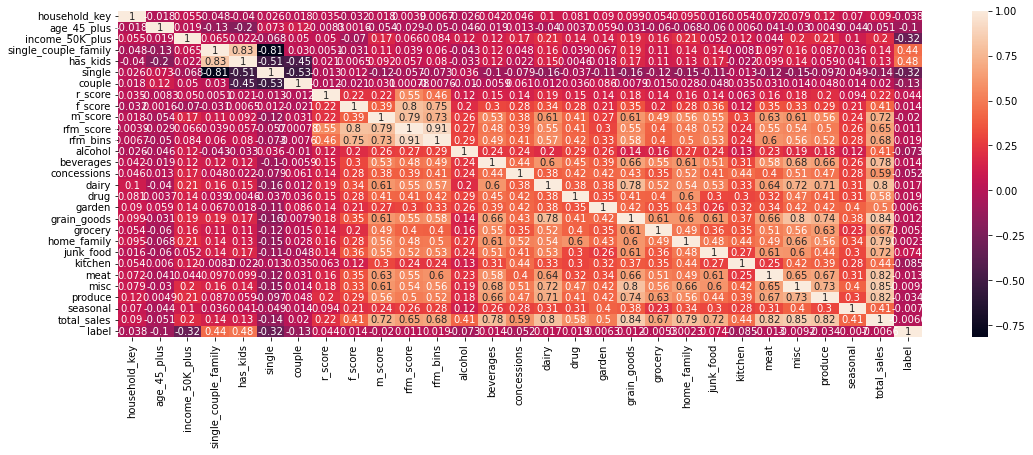

In [19]:
heatmap(grouping_households.corr(), annot=True)

# way too busy. Let's slim down and see what signals our label is reading

<AxesSubplot:>

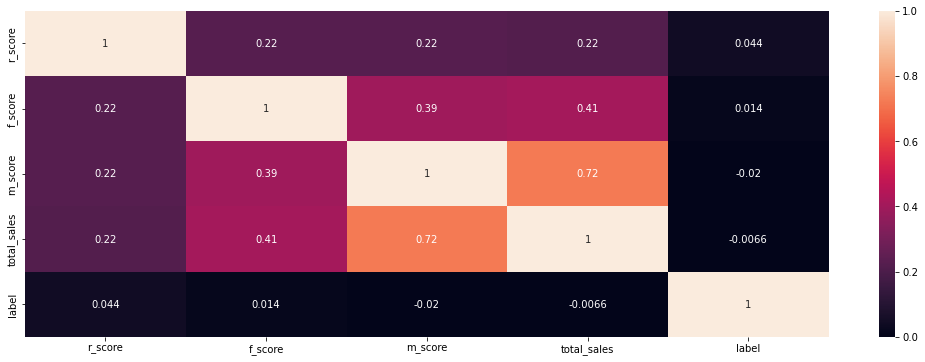

In [20]:
# heatmap to check correlation of label with r_score, f_score, m_score, and total sales
heatmap(grouping_households[['r_score', 'f_score', 'm_score', 'total_sales','label']].corr(),annot=True,vmin=0, vmax=1)

# we see low correlation in our RFM scores to the labels.

In [21]:
grouping_households.columns

Index(['household_key', 'age_45_plus', 'income_50K_plus',
       'single_couple_family', 'has_kids', 'single', 'couple', 'r_score',
       'f_score', 'm_score', 'rfm_score', 'rfm_bins', 'alcohol', 'beverages',
       'concessions', 'dairy', 'drug', 'garden', 'grain_goods', 'grocery',
       'home_family', 'junk_food', 'kitchen', 'meat', 'misc', 'produce',
       'seasonal', 'total_sales', 'label'],
      dtype='object')

<AxesSubplot:>

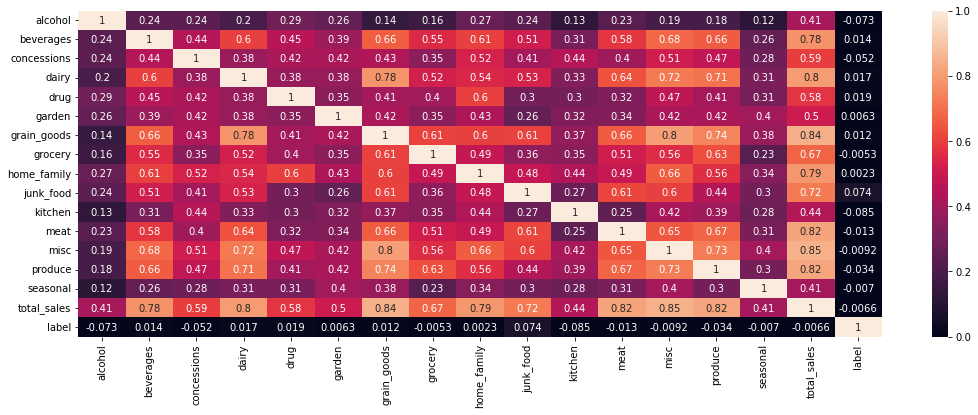

In [22]:
heatmap(grouping_households[[ 'alcohol', 'beverages','concessions', 'dairy', 'drug', 'garden', 'grain_goods', 'grocery','home_family', 'junk_food', 'kitchen', 'meat', 'misc', 'produce','seasonal', 'total_sales', 'label']].corr(),annot=True, vmin=0, vmax=1)

In [23]:
grouping_households.corr()['label'].sort_values()

single                 -0.322149
income_50K_plus        -0.321340
couple                 -0.133385
age_45_plus            -0.101106
kitchen                -0.085168
alcohol                -0.073171
concessions            -0.052443
household_key          -0.038132
produce                -0.034089
m_score                -0.019957
meat                   -0.012688
misc                   -0.009195
seasonal               -0.006966
total_sales            -0.006590
grocery                -0.005268
home_family             0.002299
garden                  0.006345
rfm_score               0.011365
grain_goods             0.011593
beverages               0.013655
f_score                 0.013687
dairy                   0.017044
drug                    0.018546
rfm_bins                0.019431
r_score                 0.044420
junk_food               0.073758
single_couple_family    0.435260
has_kids                0.475158
label                   1.000000
Name: label, dtype: float64

Looking pretty good! Our labels don't seem to be derived too much information from any one section of our data; with the exception of that income_50K_plus tag. Since it's a binary field, I find this interesting -- there's so much depth in the other columns that it might be sorting out for us in the way a '% of total sales' column might do -- and will leave it as it is. 

Let's check our labels another way; by importing the timeseries-based transaction data and examining it for each of our unsupervised label groups.

# Transactions Analysis

In [24]:


all_transactions = pd.read_csv('data/transaction_data.csv')

# only take transaction information for households for which we have demographic information
hh_transactions = all_transactions[all_transactions['household_key'].isin(grouping_households['household_key'])]

In [25]:
agg_dict = {'PRODUCT_ID':list, 'SALES_VALUE':sum}

daily_purchases = hh_transactions.groupby(['DAY','household_key']).agg(agg_dict).reset_index()

In [26]:
daily_purchases.head()

DAY  household_key                                         PRODUCT_ID  \
0    1             98         [878302, 965138, 985911, 1082185, 1087347]   
1    1            212  [822346, 830887, 866211, 866518, 869577, 89099...   
2    1            718  [830503, 839605, 840664, 844685, 848015, 85532...   
3    1           1060  [820162, 827656, 829617, 833014, 833598, 84655...   
4    1           1130        [833715, 866950, 1022843, 1048462, 1071333]   

   SALES_VALUE  
0         5.79  
1        69.26  
2       168.48  
3       139.22  
4         2.55

In [27]:
# add in sales by section data

new_data = pd.read_csv('data/daily_hh_spend.csv',index_col=0)

In [28]:
new_data.columns = ['DAY'] + list(new_data.columns[1:])

In [29]:
sales_matching = new_data.merge(daily_purchases, on=['DAY','household_key'])
sales_matching

DAY  household_key  alcohol  beverages  concessions  dairy  drug  \
0      101              1     0.00       7.34         0.00   4.77  0.00   
1      101              8     0.00       0.00         7.99   6.31  0.00   
2      101             13     0.00       0.00         0.00   2.79  0.00   
3      101             42    11.57       0.00         0.00   0.00  0.00   
4      101             55     0.00       0.00         0.00   1.99  0.00   
...    ...            ...      ...        ...          ...    ...   ...   
99748  708           2376     9.99       3.99         5.68   0.00  0.00   
99749  708           2380     0.00       0.00         0.00   1.00  2.25   
99750  708           2393     0.00       7.70         0.00   5.00  5.64   
99751  708           2400     0.00       0.00         0.00   0.00  0.00   
99752  708           2483     0.00       3.19         0.00  14.14  0.00   

       garden  grain_goods  grocery  home_family  junk_food  kitchen   meat  \
0         0.0        10.48     0.00        12.18      10.91     0.00   6.27   
1         0.0         0.00     0.00         0.00       1.00     0.33   1.09   
2         0.0         0.00     0.00         0.00      12.50     0.00   0.00   
3         0.0         0.00     3.74         0.00       2.50     0.00   1.69   
4         0.0         6.39     0.00         0.00      10.49     0.00   0.00   
...       ...          ...      ...          ...        ...      ...    ...   
99748     0.0         0.00     0.00         7.99       6.47     0.00   0.00   
99749     0.0        11.84     0.00         6.74       2.99     0.00  13.94   
99750     0.0         7.09     0.00        29.40       3.50     0.00  20.11   
99751     0.0         0.00     0.00        19.48       1.00     0.00   0.00   
99752     0.0        30.18     0.00        19.78      19.55     5.99   4.48   

       misc  produce  seasonal  total_sales  \
0      1.50     0.00      0.00        53.45   
1      1.94     0.00      0.00        18.66   
2      0.00     0.00     27.73        43.02   
3      0.00     0.00      0.00        19.50   
4      0.00     2.29      0.00        21.16   
...     ...      ...       ...          ...   
99748  0.00     0.00      0.00        34.12   
99749  3.79     2.99      0.00        45.54   
99750  0.00     0.00      0.00        78.44   
99751  0.00     0.00      0.00        20.48   
99752  0.00    19.34      0.00       116.65   

                                              PRODUCT_ID  SALES_VALUE  
0      [852662, 856942, 887375, 909472, 922417, 93113...        53.45  
1      [840361, 865456, 931671, 1080638, 1106523, 101...        18.66  
2                    [942385, 1106523, 5569230, 9883918]        43.02  
3              [861445, 877770, 928550, 986912, 9832514]        19.50  
4      [850102, 879528, 890610, 947678, 995242, 10821...        21.16  
...                                                  ...          ...  
99748  [852856, 961298, 1011300, 1027569, 834117, 101...        34.12  
99749  [822735, 832678, 843744, 844839, 851277, 85364...        45.54  
99750  [847207, 871611, 900770, 908064, 913371, 92374...        78.44  
99751  [912233, 1029833, 6533765, 6534166, 1065593, 8...        60.48  
99752  [824305, 855257, 872137, 918846, 951412, 98048...       116.65  

[99753 rows x 20 columns]

This table represents all orders (transaction baskets) for the customers in our demographic data. 

Grouping customers by the (types of) products that they buy (on the same days; days of the week) could be useful.

we should have a distinct day/household_key pairing here. confirm:

In [30]:
my_set = set()

for idx, row in sales_matching[['DAY','household_key']].iterrows():
    # print(x)
    my_set.add(tuple((row['DAY'], row['household_key'])))

assert len(my_set) == len(sales_matching)

Nice. This can be the dataset we use for both timeseries-based k-means clustering, as well as arima timeseries modelling.

In [31]:

# grab our previous labels
label_map = dict(zip(list(grouping_households['household_key']), list(grouping_households['label'])))

In [32]:
# apply them to the timeseries data, for reference
sales_matching['unsupervised_label'] = sales_matching['household_key'].map(label_map)

<AxesSubplot:>

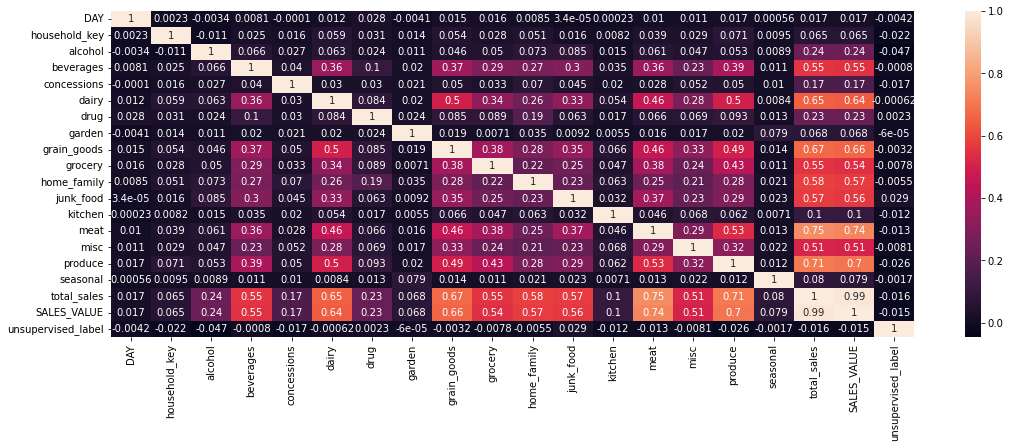

In [33]:
# drop the products list; we can use it later 
heatmap(sales_matching.drop('PRODUCT_ID', axis=1).corr(), annot=True)

Looks like our kmeans did a pretty good job clustering households in the `hh_summary` table without relying too much on any one column in the `sales_matching` (timeseries) data, above. We see that the major product sales categories are significantly related, which is to be expected with this type of timeseries purchase data -- when they're in the store, they buy the staples. 


Let's move forward with the hh_summary tags for now and go back to the original purpose; to aggregate section sales over time more effectively; such as to reach product-level granularity and identify similarities between purchase patterns of our customers. 

In [34]:
# NOTE: sales_value and total_sales are not 100% matching. investigate... 
# sales_matching[~(sales_matching['total_sales'] == sales_matching['SALES_VALUE'])]

# these rows were affected by the previous removal of gasoline sales, etc?

total sales values for customer label 4
alcohol         17529.14
beverages       24778.25
concessions     10255.54
dairy           43745.20
drug            15148.91
garden           1493.58
grain_goods     41024.05
grocery         22390.27
home_family     60397.33
junk_food       56919.98
kitchen           810.38
meat           101692.15
misc            28922.92
produce         53396.92
seasonal         1641.60
dtype: float64


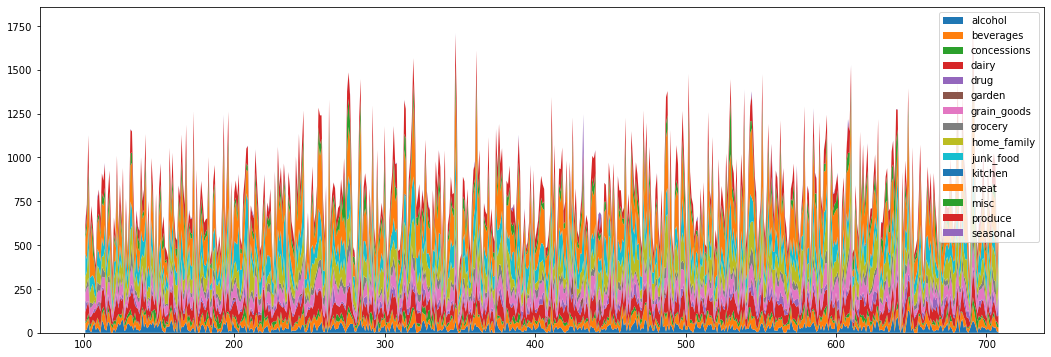

total sales values for customer label 3
alcohol         51348.35
beverages       69490.58
concessions     27029.43
dairy          125341.35
drug            31749.90
garden           2968.09
grain_goods    120590.30
grocery         65945.43
home_family    179313.50
junk_food      159447.03
kitchen          2101.21
meat           256451.70
misc            85843.70
produce        139528.71
seasonal         4635.06
dtype: float64


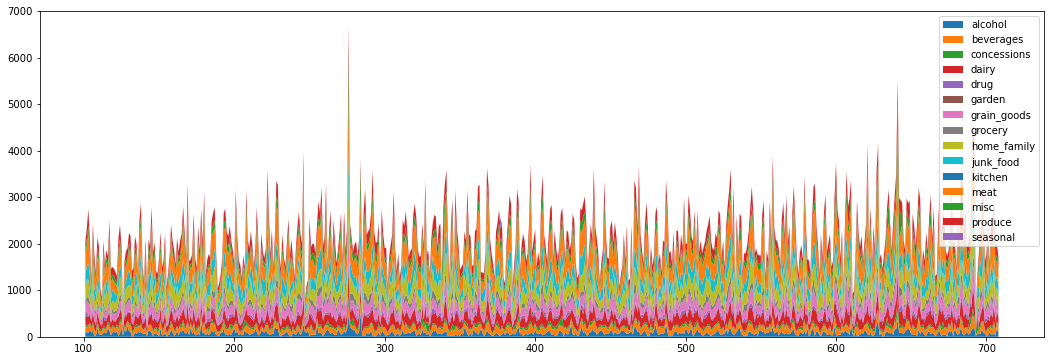

total sales values for customer label 2
alcohol         45950.43
beverages       34028.66
concessions     16513.45
dairy           61795.64
drug            22319.57
garden           1682.98
grain_goods     54952.15
grocery         33018.71
home_family     87656.02
junk_food       72537.68
kitchen          1402.98
meat           119417.77
misc            41445.16
produce         79671.17
seasonal         2512.14
dtype: float64


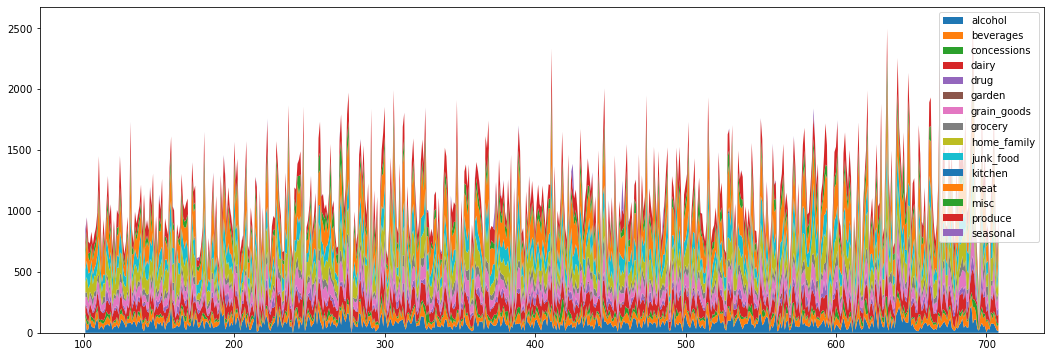

total sales values for customer label 1
alcohol         31116.34
beverages       31646.57
concessions     11239.09
dairy           50934.03
drug            14544.63
garden            850.08
grain_goods     51452.85
grocery         26858.43
home_family     65076.60
junk_food       72157.90
kitchen          1269.72
meat           136413.75
misc            36532.67
produce         63650.69
seasonal         1938.69
dtype: float64


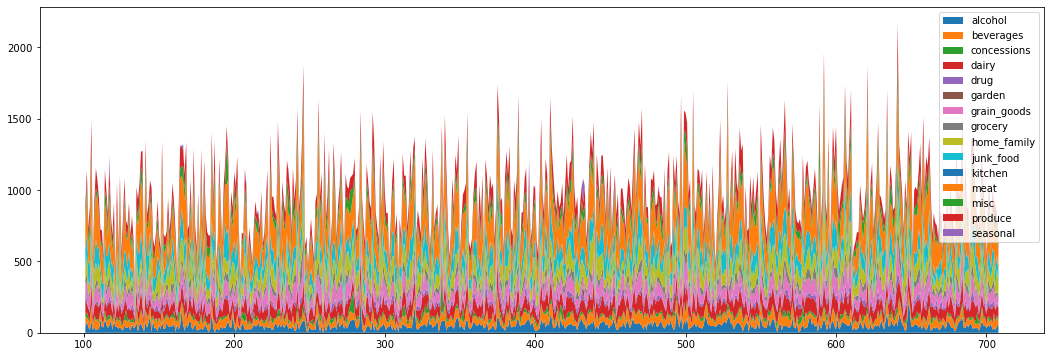

total sales values for customer label 0
alcohol         42598.03
beverages       38762.66
concessions     20673.94
dairy           72000.89
drug            20476.09
garden           2316.55
grain_goods     68032.81
grocery         39427.43
home_family    108327.55
junk_food       75570.89
kitchen          1745.51
meat           153381.11
misc            50622.85
produce         92466.06
seasonal         2888.13
dtype: float64


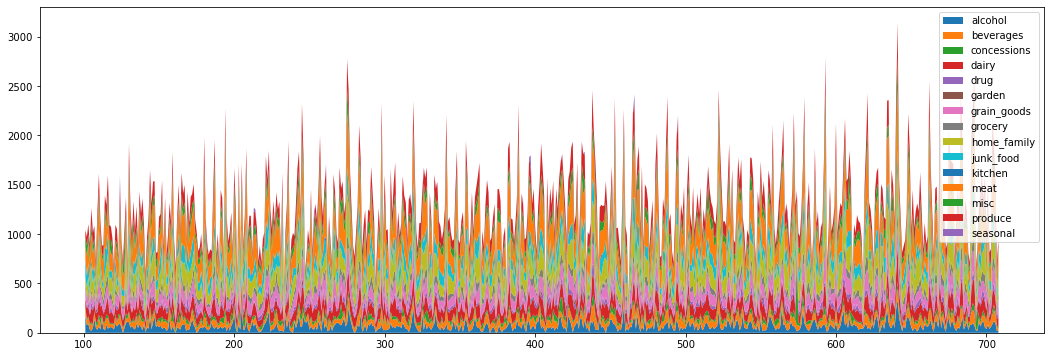

In [35]:

for label in sales_matching['unsupervised_label'].unique():
    temp = sales_matching[sales_matching['unsupervised_label'] == label].drop(['household_key', 'PRODUCT_ID', 'unsupervised_label', 'total_sales', 'SALES_VALUE'], axis=1).groupby('DAY').sum().reset_index()

    # print(temp.columns)
    # Create data
    x=list(temp['DAY'])
    cols = temp.columns[1:]

    print(f"total sales values for customer label {label}")
    print(temp[cols].sum())
    y = temp[cols].T.to_numpy()

    fig, ax = plt.subplots()
    plt.stackplot(x, y, labels=cols, baseline='zero')
    plt.legend()
    plt.show()

This is pretty good, but we'd like to clean it up even further. Let's take a rolling window of the sales totals, over a span of 14 days.

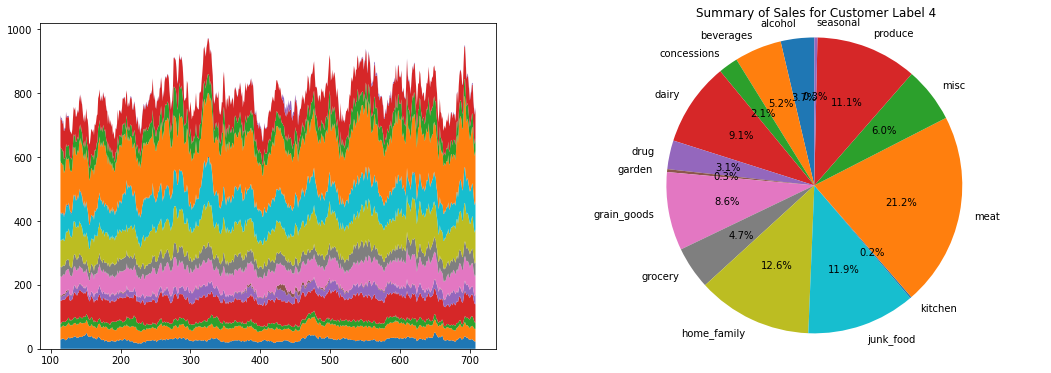

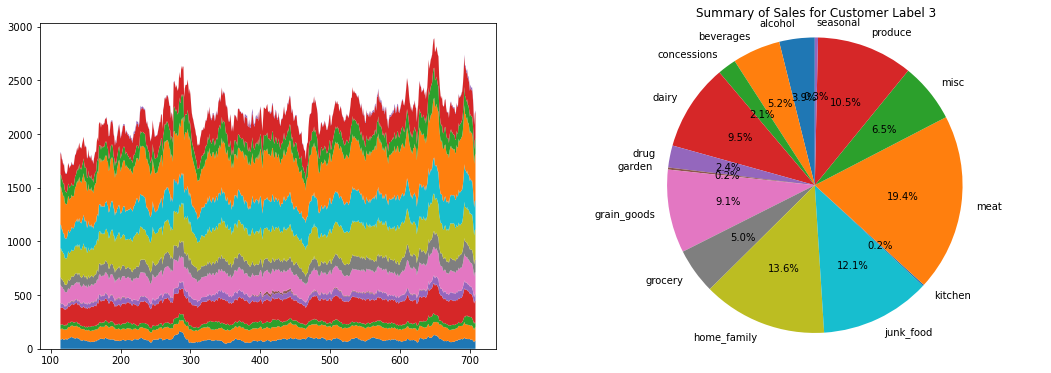

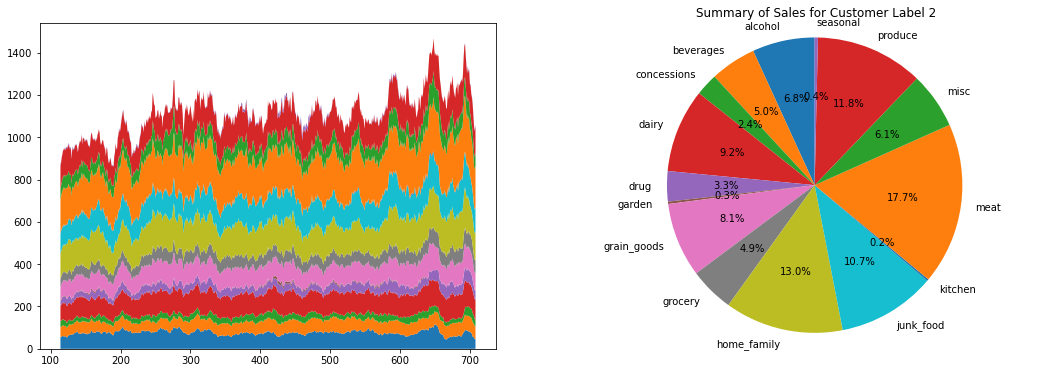

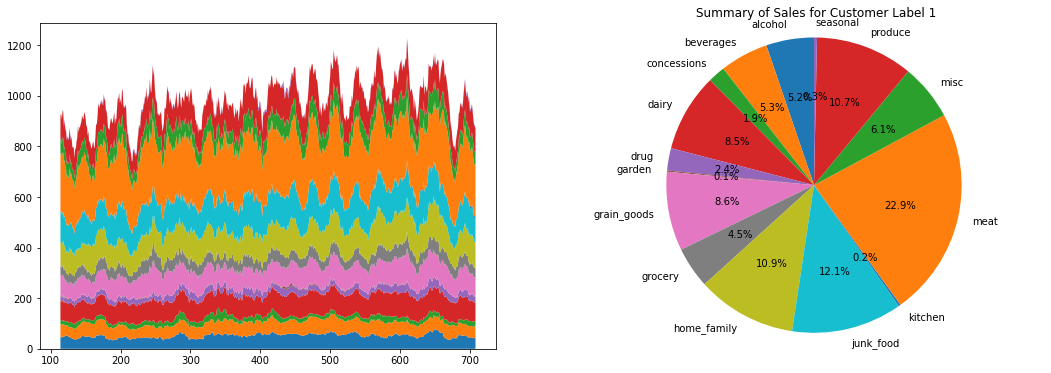

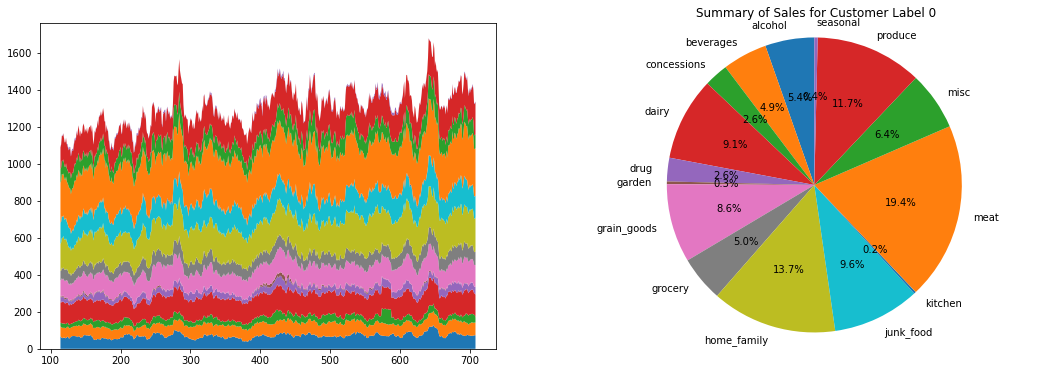

In [36]:
import itertools
import seaborn as sns


colormap = {y:x for x,y in zip(cols,itertools.cycle(sns.color_palette()))}

window_size = 14

for label in sales_matching['unsupervised_label'].unique():
    temp = sales_matching[sales_matching['unsupervised_label'] == label].drop(['household_key', 'PRODUCT_ID', 'unsupervised_label', 'total_sales', 'SALES_VALUE'], axis=1).groupby('DAY').sum().rolling(window_size).mean()[window_size-1:].reset_index()

    # print(temp.columns)
    # Create data
    x=list(temp['DAY'])
    cols = temp.columns[1:]
    y = temp[cols].T.to_numpy()

    total_label_sales = sales_matching[sales_matching['unsupervised_label'] == label]['total_sales'].sum()
    proportion_of_total = {x:round(x/total_label_sales*100, 2) for x in temp[cols].sum()}
    
    # print(f"total sales values for customer label {label}")
    # print(total_label_sales)
    # print("proportion of total label sales")
    # print(dict(zip(cols, proportion_of_total.values())))


    # plotting 
    fig, ax = plt.subplots(1,2)
    plt.title(f"Summary of Sales for Customer Label {label}")
    # stackplot
    plt.subplot(1,2,1)
    plt.stackplot(x, y, labels=cols, baseline='zero', colors=colormap)
    #plt.legend(loc='upper left')



    # pieplot 
    plt.subplot(1,2,2)
    plt.pie(proportion_of_total.values(), labels=cols, autopct='%1.1f%%',startangle=90, colors=colormap)
    #plt.legend(loc='upper left')

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


Interesting, it appears that the kmeans model clustered households who have 'dips' in their spending at similar times. We might wonder if those dips correspond to sales of particular products; that they were out of stock for a particular time, for example. 